<a href="https://www.kaggle.com/code/nooralrajab/arrhythmia-classificaiton-ipynb?scriptVersionId=219124366" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
with_ppg=[]
import os
for dirname, _, filenames in os.walk('/kaggle/input/challenge2015-reducing-false-arrhythmia/Challenge2015_csv/'):
    for filename in filenames:
        if(filename!="ALARMS"):
            if("PLETH" in pd.read_csv(dirname+filename).columns):
                with_ppg.append(filename[0:-4])

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Start with 2015 dataset and remove samples with asystole

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df=pd.read_csv("/kaggle/input/challenge2015-reducing-false-arrhythmia/Challenge2015_csv/ALARMS", names=["Sample", "Label", "TrueAlarm"])
df_relevant=df.loc[df["Label"]!="Asystole"].copy()
df_relevant

,Sample,Label,TrueAlarm
0,v100s,Ventricular_Tachycardia,0
1,v101l,Ventricular_Tachycardia,0
2,v102s,Ventricular_Tachycardia,0
6,t106s,Tachycardia,1
7,t107l,Tachycardia,1
...,...,...,...
744,v844s,Ventricular_Tachycardia,1
745,v845l,Ventricular_Tachycardia,0
746,v846s,Ventricular_Tachycardia,0
748,v848s,Ventricular_Tachycardia,0


## Remove samples without PPG

In [3]:
df_filtered=df_relevant.loc[df_relevant["Sample"].isin(with_ppg)].copy()
df_filtered

,Sample,Label,TrueAlarm
0,v100s,Ventricular_Tachycardia,0
1,v101l,Ventricular_Tachycardia,0
2,v102s,Ventricular_Tachycardia,0
6,t106s,Tachycardia,1
7,t107l,Tachycardia,1
...,...,...,...
740,b840s,Bradycardia,1
743,v843l,Ventricular_Tachycardia,0
746,v846s,Ventricular_Tachycardia,0
748,v848s,Ventricular_Tachycardia,0


## Adding a path column

In [4]:
df_filtered["Path"]=["/kaggle/input/challenge2015-reducing-false-arrhythmia/Challenge2015_csv/"+x+".csv" for x in df_filtered["Sample"]]
df_filtered

,Sample,Label,TrueAlarm,Path
0,v100s,Ventricular_Tachycardia,0,/kaggle/input/challenge2015-reducing-false-arr...
1,v101l,Ventricular_Tachycardia,0,/kaggle/input/challenge2015-reducing-false-arr...
2,v102s,Ventricular_Tachycardia,0,/kaggle/input/challenge2015-reducing-false-arr...
6,t106s,Tachycardia,1,/kaggle/input/challenge2015-reducing-false-arr...
7,t107l,Tachycardia,1,/kaggle/input/challenge2015-reducing-false-arr...
...,...,...,...,...
740,b840s,Bradycardia,1,/kaggle/input/challenge2015-reducing-false-arr...
743,v843l,Ventricular_Tachycardia,0,/kaggle/input/challenge2015-reducing-false-arr...
746,v846s,Ventricular_Tachycardia,0,/kaggle/input/challenge2015-reducing-false-arr...
748,v848s,Ventricular_Tachycardia,0,/kaggle/input/challenge2015-reducing-false-arr...


## Get paths and sample names from A-Fib dataset

In [5]:
afib_paths=[]
healthy_paths=[]
afib_samples=[]
healthy_samples=[]

for dirname, _, filenames in os.walk('/kaggle/input/mimic-perform-af-dataset/mimic_perform_af_csv/mimic_perform_af_csv'):
    for filename in filenames:
        if("csv" in filename):
            afib_paths.append(dirname+"/"+filename)
            filename_split=filename.split("_")
            afib_samples.append(filename_split[2]+"_"+filename_split[3])

for dirname, _, filenames in os.walk('/kaggle/input/mimic-perform-af-dataset/mimic_perform_non_af_csv/mimic_perform_non_af_csv'):
    for filename in filenames:
        if("csv" in filename):
            healthy_paths.append(dirname+"/"+filename)
            filename_split=filename.split("_")
            healthy_samples.append(filename_split[2]+"_"+filename_split[3]+"_"+filename_split[4])

In [6]:
afib_df=pd.DataFrame({"Sample":afib_samples,
        "Label":19*["Atrial_Fibrillation"],
        "TrueAlarm":19*[True],
        "Path":afib_paths})

healthy_df=pd.DataFrame({"Sample":healthy_samples,
        "Label":16*["Healthy"],
        "TrueAlarm":16*[True],
        "Path":healthy_paths})

df_filtered=pd.concat([df_filtered, afib_df, healthy_df])
df_filtered

,Sample,Label,TrueAlarm,Path
0,v100s,Ventricular_Tachycardia,0,/kaggle/input/challenge2015-reducing-false-arr...
1,v101l,Ventricular_Tachycardia,0,/kaggle/input/challenge2015-reducing-false-arr...
2,v102s,Ventricular_Tachycardia,0,/kaggle/input/challenge2015-reducing-false-arr...
6,t106s,Tachycardia,1,/kaggle/input/challenge2015-reducing-false-arr...
7,t107l,Tachycardia,1,/kaggle/input/challenge2015-reducing-false-arr...
...,...,...,...,...
11,non_af_012,Healthy,1,/kaggle/input/mimic-perform-af-dataset/mimic_p...
12,non_af_003,Healthy,1,/kaggle/input/mimic-perform-af-dataset/mimic_p...
13,non_af_004,Healthy,1,/kaggle/input/mimic-perform-af-dataset/mimic_p...
14,non_af_001,Healthy,1,/kaggle/input/mimic-perform-af-dataset/mimic_p...


## Get statistics of how many waveforms are available for each condition

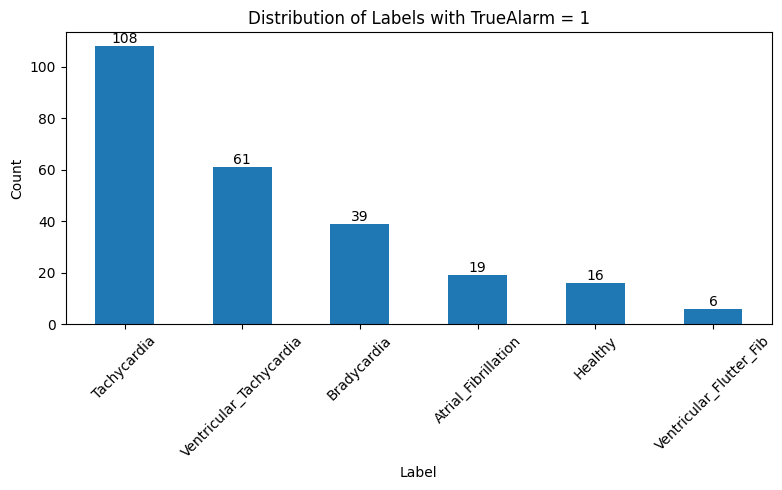

In [7]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = df_filtered.loc[df_filtered["TrueAlarm"] == 1, "Label"].value_counts()

# Plot as a bar plot
label_counts.plot(kind="bar", figsize=(8, 5))
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels with TrueAlarm = 1")
plt.xticks(rotation=45)
plt.bar_label(plt.gca().containers[0])  # Add count labels on bars
plt.tight_layout()
plt.show()


## Resampling attempt: from 125 Hz to 250 Hz sampling frequency

In [8]:
import numpy as np

signal=pd.read_csv("/kaggle/input/mimic-perform-af-dataset/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_001_data.csv")["ECG"].values[0:100]

# Original ECG signal and sampling frequency
ecg_signal = np.array(signal)  # Replace with your ECG data
fs_original = 125  # Original sampling frequency
fs_new = 250  # New sampling frequency

# Create new time points
original_time = np.arange(len(ecg_signal)) / fs_original
new_time = np.arange(0, original_time[-1], 1/fs_new)

# Interpolate using the average of surrounding points
from scipy.interpolate import interp1d
interp_function = interp1d(original_time, ecg_signal, kind='linear')  # Linear interpolation
new_ecg_signal = interp_function(new_time)

# Output new signal
print("Resampled ECG Signal:", new_ecg_signal)


Resampled ECG Signal: [0.31445312 0.29980469 0.28515625 0.29296875 0.30078125 0.30273438
 0.3046875  0.29980469 0.29492188 0.29492188 0.29492188 0.29492188
 0.29492188 0.29785156 0.30078125 0.30078125 0.30078125 0.30273438
 0.3046875  0.30273438 0.30078125 0.30273438 0.3046875  0.30761719
 0.31054688 0.31054688 0.31054688 0.3125     0.31445312 0.31933594
 0.32421875 0.32421875 0.32421875 0.32421875 0.32421875 0.32421875
 0.32421875 0.33007812 0.3359375  0.3359375  0.3359375  0.3359375
 0.3359375  0.3359375  0.3359375  0.34082031 0.34570312 0.35058594
 0.35546875 0.35546875 0.35546875 0.35742188 0.359375   0.36230469
 0.36523438 0.37011719 0.375      0.37792969 0.38085938 0.38085938
 0.38085938 0.38574219 0.390625   0.39746094 0.40429688 0.40722656
 0.41015625 0.41308594 0.41601562 0.42089844 0.42578125 0.43066406
 0.43554688 0.44238281 0.44921875 0.45507812 0.4609375  0.46582031
 0.47070312 0.47558594 0.48046875 0.48242188 0.484375   0.48242188
 0.48046875 0.47753906 0.47460937 0.46191

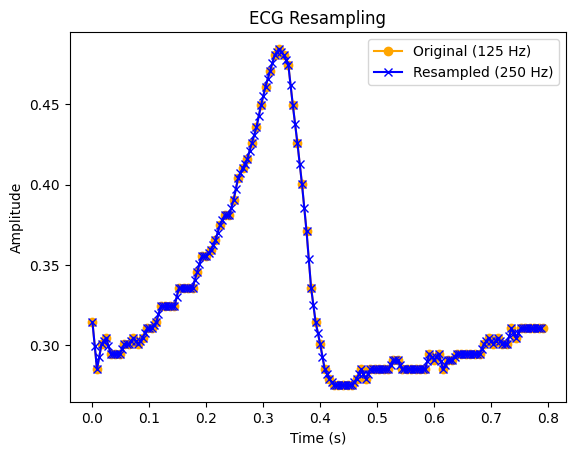

In [9]:
import matplotlib.pyplot as plt

plt.plot(original_time, ecg_signal, label="Original (125 Hz)", marker='o', color='orange')
plt.plot(new_time, new_ecg_signal, label="Resampled (250 Hz)", marker='x', color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("ECG Resampling")
plt.show()


## Resampling function

In [10]:
import numpy as np
from scipy.interpolate import interp1d

def resample(signal, fs_original=125, fs_new=250):
    # Original ECG signal and sampling frequency
    ecg_signal = np.array(signal)  # Replace with your ECG data
    
    # Create new time points
    original_time = np.arange(len(ecg_signal)) / fs_original
    new_time = np.arange(0, original_time[-1], 1/fs_new)
    
    # Interpolate using the average of surrounding points
    interp_function = interp1d(original_time, ecg_signal, kind='linear')  # Linear interpolation
    new_ecg_signal = interp_function(new_time)
    
    return new_ecg_signal


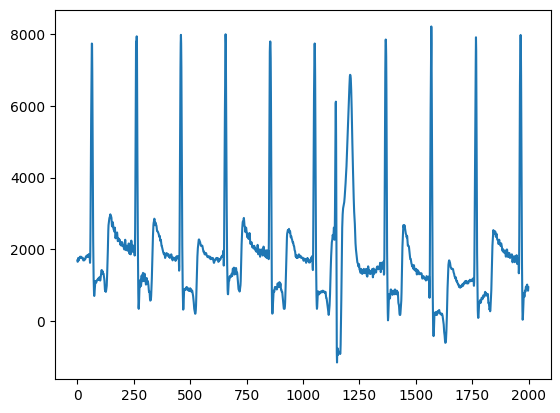

In [11]:
plt.plot(pd.read_csv(df_filtered.loc[(df_filtered["Label"]=="Ventricular_Tachycardia") & (df_filtered["TrueAlarm"]==1), "Path"].values[0])["II"].values[30000:32000])

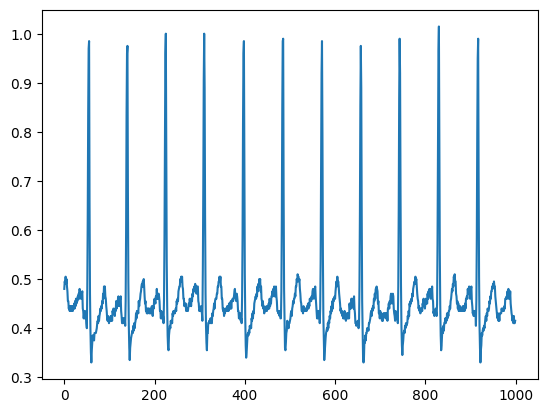

In [12]:
plt.plot(pd.read_csv(df_filtered.loc[df_filtered["Label"]=="Healthy", "Path"].values[0])["ECG"].values[70000:71000])

## getWaveform
A function that returns a single interval of the desired condition, signal type, offset, and duration. It also resamples if the source waveform has a sampling frequency of 125 instead of 250.

In [31]:
chunk_len=2048

def getWaveform(label, index, sampleType, startPoint=0, duration=chunk_len, trueAlarm=1):
    if(label=="Atrial_Fibrillation" or label=="Healthy"):
        return resample(pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])[sampleType].values[startPoint:startPoint+int(duration/2)])
    else:
        if(sampleType=="ECG"):
            sampleType="II"
        elif(sampleType=="PPG"):
            sampleType="PLETH"
        try:
            return pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])[sampleType].values[startPoint:startPoint+duration]
        except:
            return pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])["V"].values[startPoint:startPoint+duration]

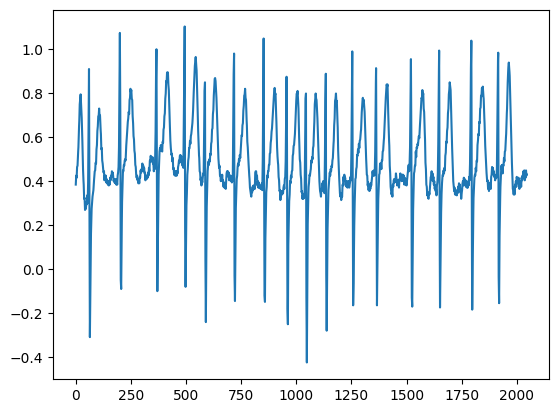

In [14]:
plt.plot(getWaveform("Atrial_Fibrillation", 0, "ECG"))

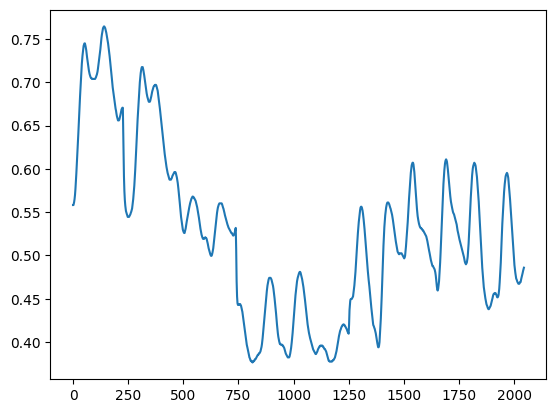

In [15]:
plt.plot(getWaveform("Atrial_Fibrillation", 0, "PPG"))

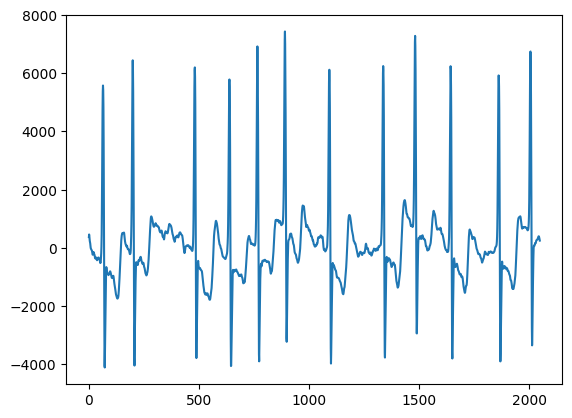

In [16]:
plt.plot(getWaveform("Ventricular_Flutter_Fib", 3, "ECG"))

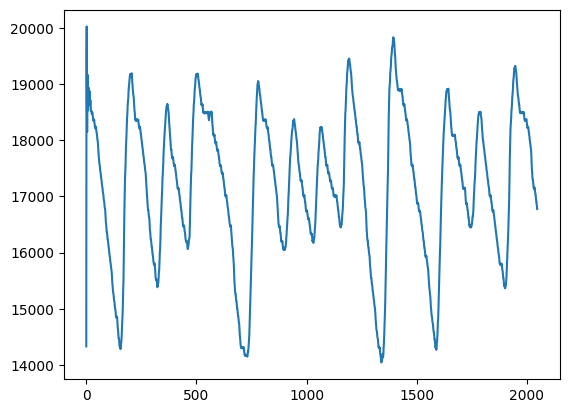

In [17]:
plt.plot(getWaveform("Ventricular_Flutter_Fib", 3, "PPG"))

## getWaveforms
A function that returns a **list** of intervals included in the full waveform.

In [18]:
def getWaveforms(label, index, sampleType, duration=chunk_len, trueAlarm=1):
    if(label=="Atrial_Fibrillation" or label=="Healthy"):
        fullWaveform = resample(pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])[sampleType].values)
        periodsList=[]
        for i in range(int(np.floor(len(fullWaveform)/duration))):
            periodsList.append(fullWaveform[i*duration:(i*duration)+duration])
        return periodsList
    else:
        if(sampleType=="ECG"):
            sampleType="II"
        elif(sampleType=="PPG"):
            sampleType="PLETH"
        fullWaveform = pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])[sampleType].values
        periodsList=[]
        for i in range(int(np.floor(len(fullWaveform)/duration))):
            periodsList.append(fullWaveform[i*duration:(i*duration)+duration])
        return periodsList

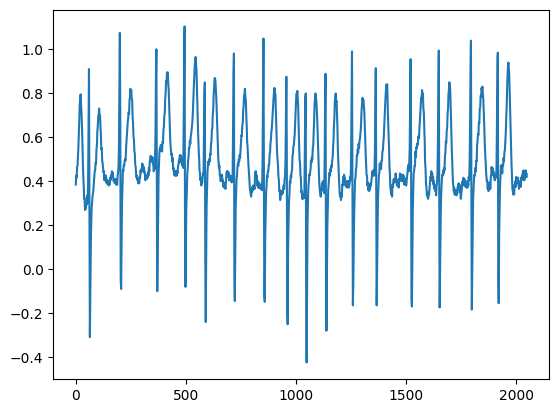

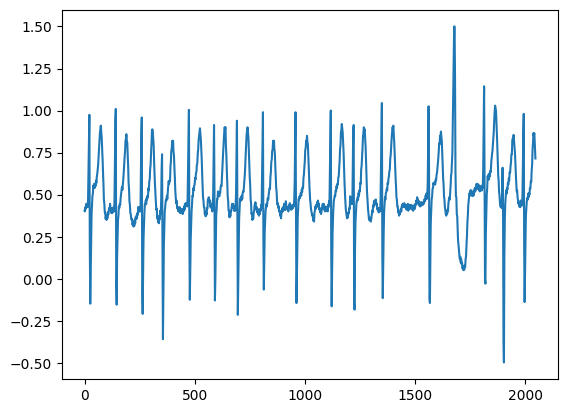

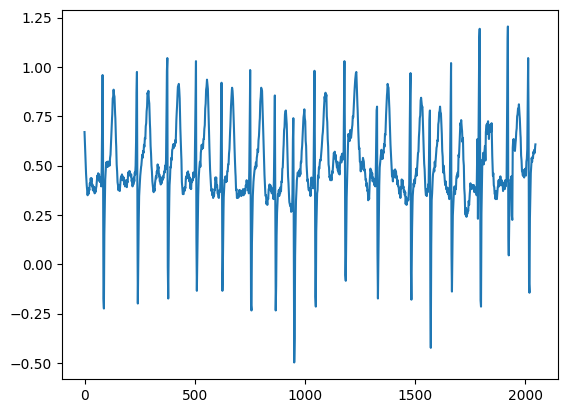

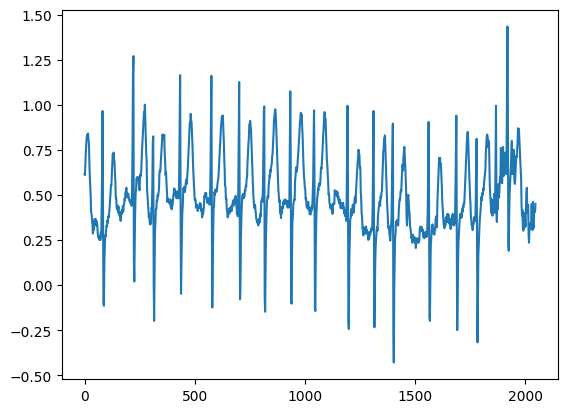

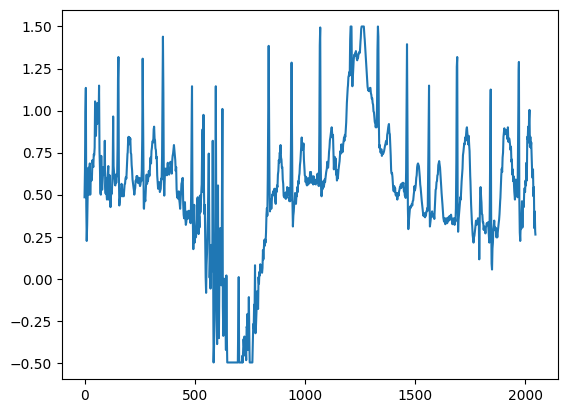

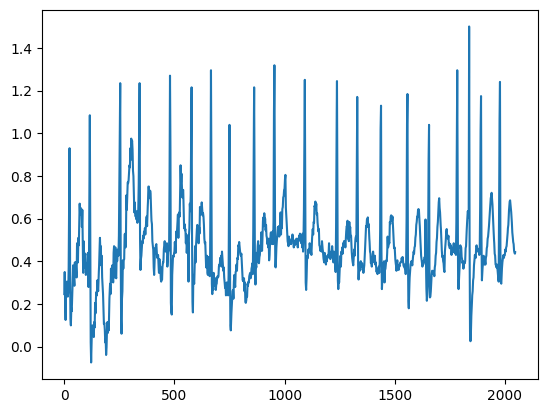

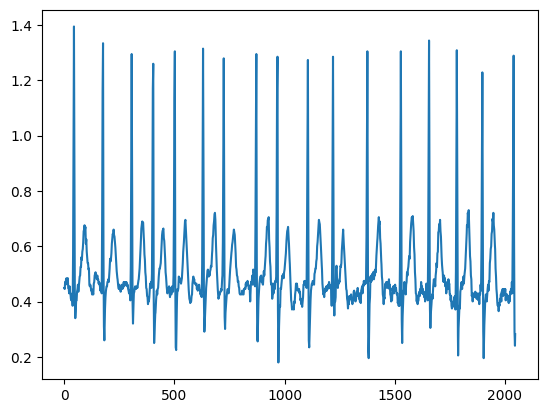

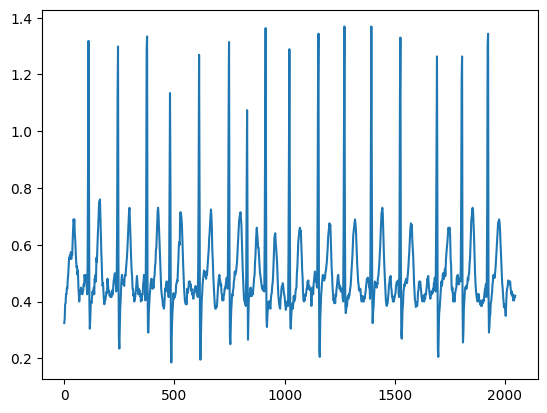

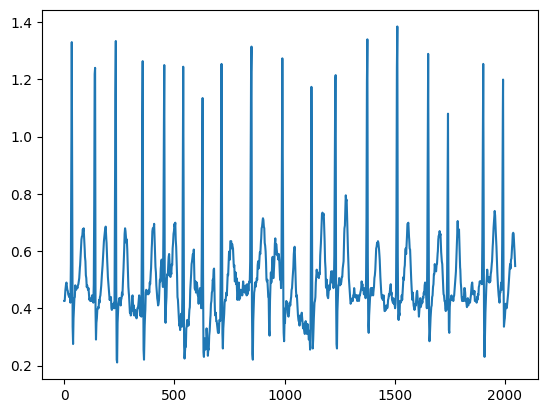

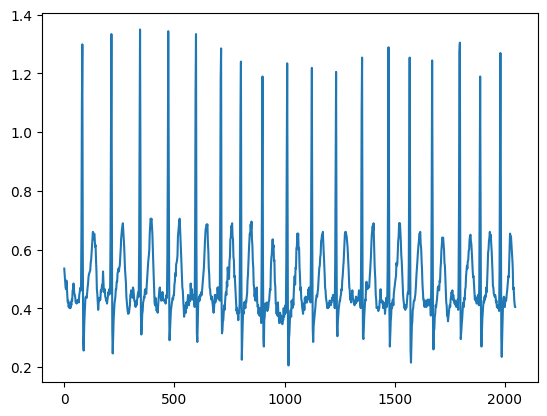

In [19]:
periods=getWaveforms("Atrial_Fibrillation", 0, "ECG")
for i in range(10):
    plt.plot(periods[i])
    plt.show()

## Plot FFT peaks

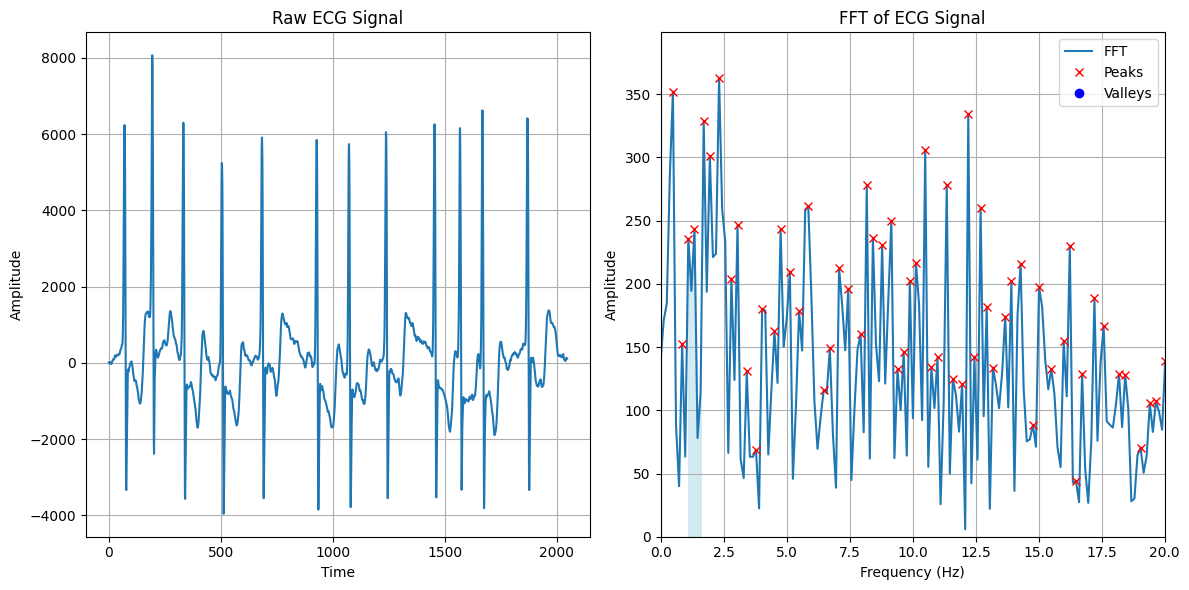

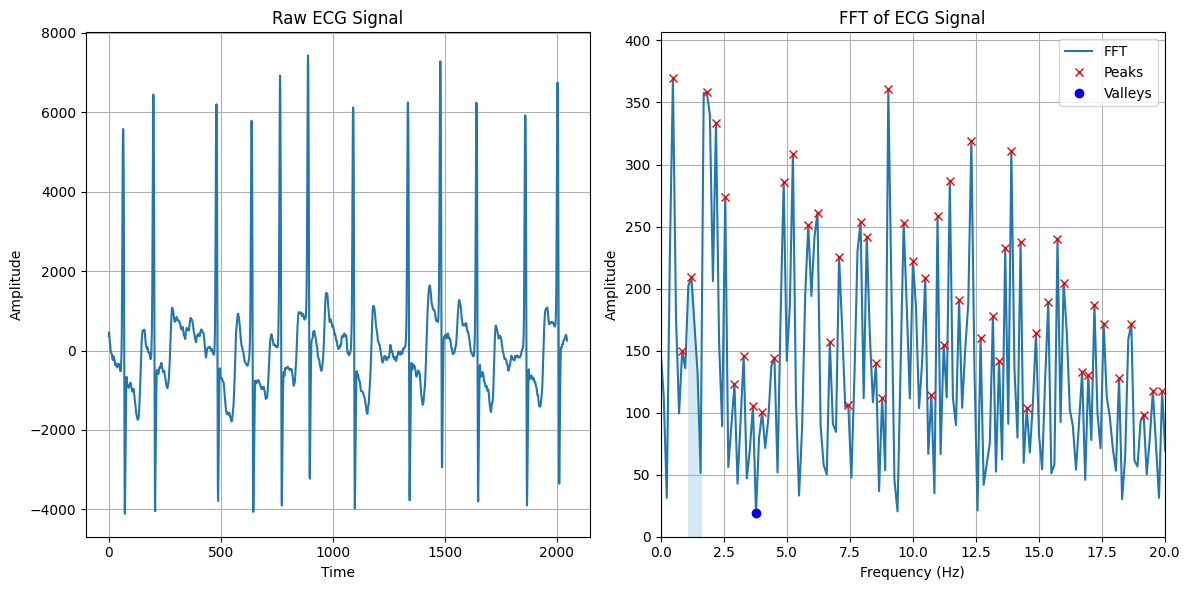

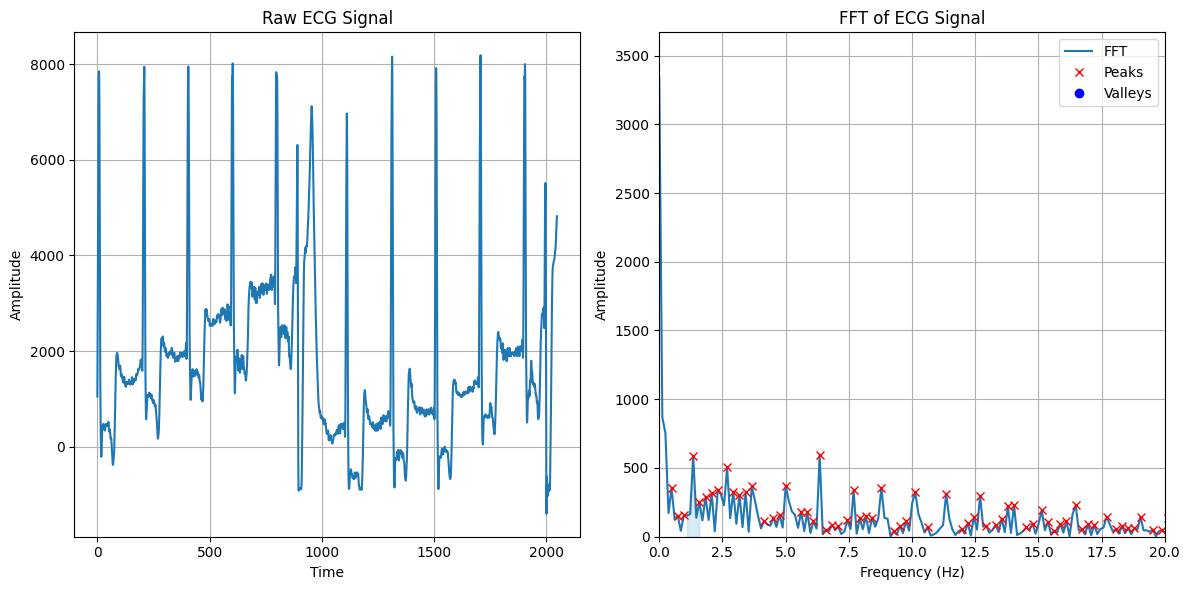

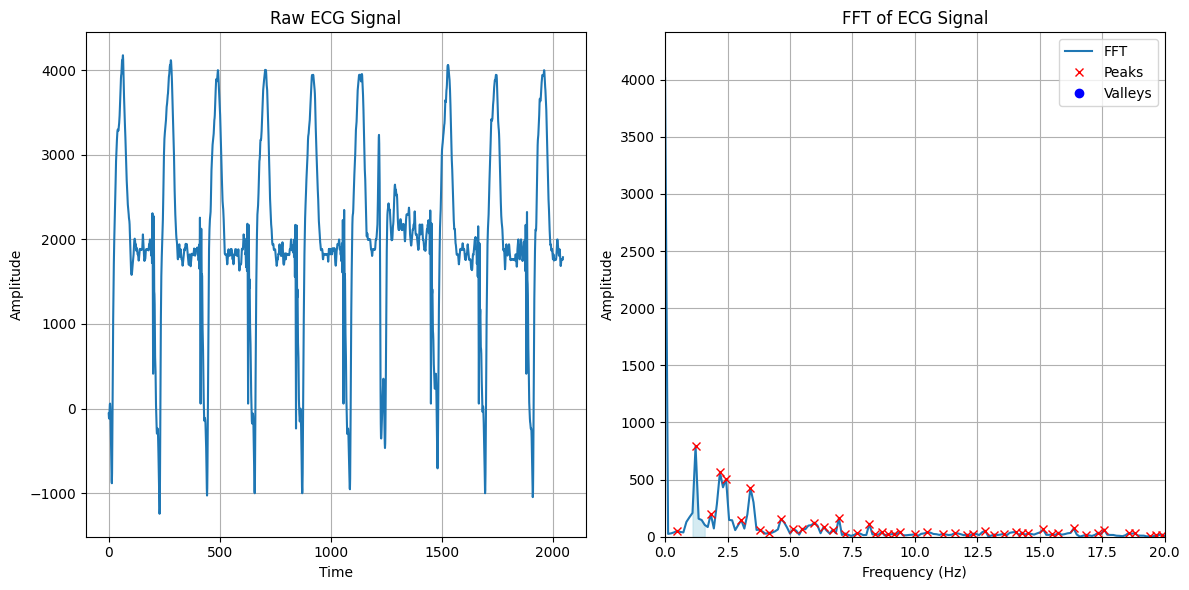

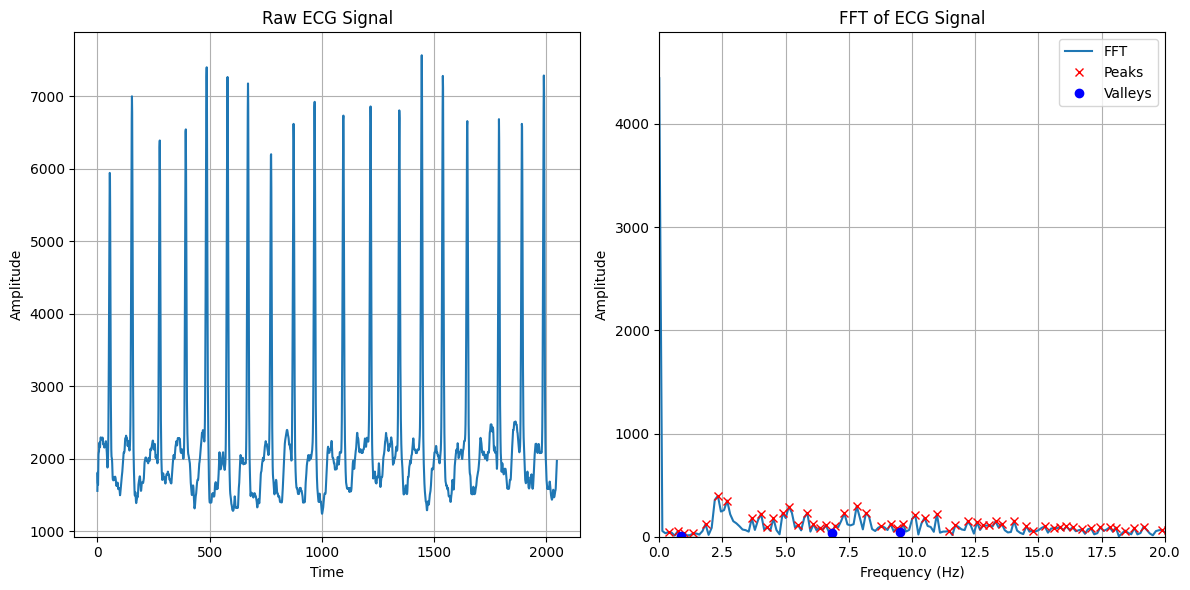

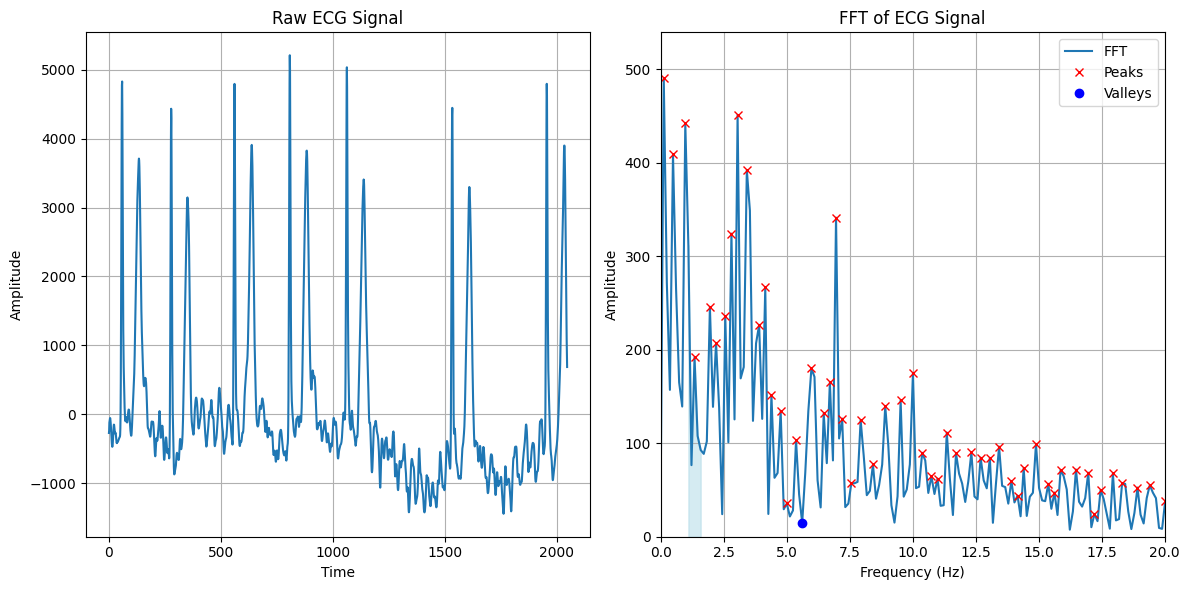

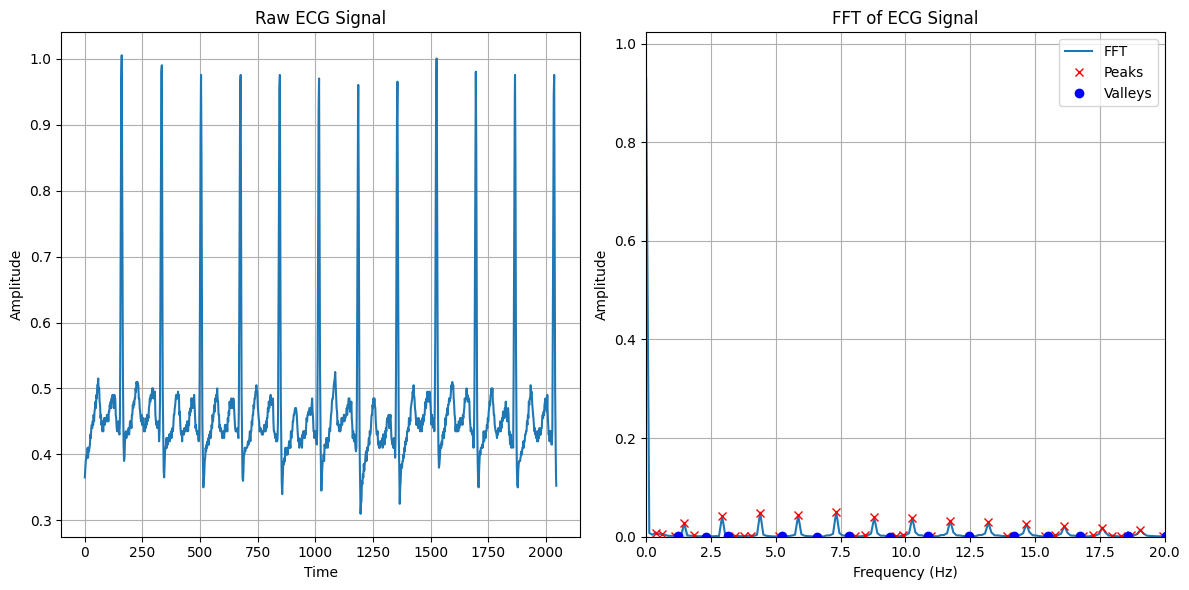

In [57]:
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = 250

# List of signals
signals = [getWaveform("Ventricular_Flutter_Fib", 2, "ECG"),
           getWaveform("Ventricular_Flutter_Fib", 3, "ECG"),
           getWaveform("Ventricular_Tachycardia", 0, "ECG"),
           getWaveform("Ventricular_Tachycardia", 1, "ECG"),
           getWaveform("Tachycardia", 0, "ECG"),
           getWaveform("Bradycardia", 0, "ECG"),
          getWaveform("Healthy", 0, "ECG")]

for signal in signals:
    # Time-domain parameters
    N = len(signal)

    # Frequency-domain parameters
    yf = fft(signal)
    xf = fftfreq(N, 1 / fs)[:N // 2]
    yf_processed = 2.0 / N * np.abs(yf[:N // 2])

    # Detect peaks and valleys
    peaks, _ = find_peaks(2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=None,
                          prominence=0.00005,
                          width=None,
                          rel_height=0.5)
    
    valleys, _ = find_peaks(-2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=None,
                          prominence=0.00002,
                          width=10,
                          rel_height=0.5)

    # Plot raw signal and its FFT
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Left plot: Raw signal
    ax[0].plot(signal)
    ax[0].set_title('Raw ECG Signal')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')
    ax[0].grid()

    # Right plot: FFT
    ax[1].plot(xf, yf_processed, label='FFT')
    ax[1].plot(xf[peaks], yf_processed[peaks], "x", label="Peaks", color='red')
    ax[1].plot(xf[valleys], yf_processed[valleys], "o", label="Valleys", color='blue')
    ax[1].fill_between(xf, yf_processed, where=(xf >= 1) & (xf <= 1.67), color='lightblue', alpha=0.5)
    ax[1].set_xlim([0, 20])
    ax[1].set_ylim([0, max(yf_processed) * 1.1])  # Dynamic amplitude limit
    ax[1].set_title('FFT of ECG Signal')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[1].grid()
    ax[1].legend()

    plt.tight_layout()
    plt.show()


1


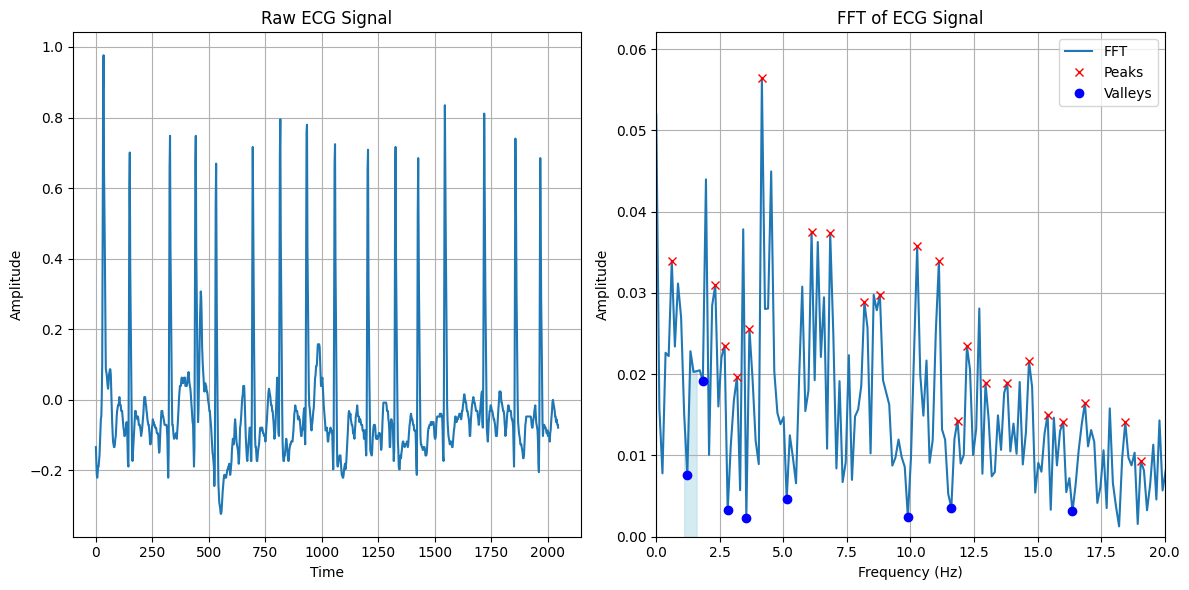

1.5


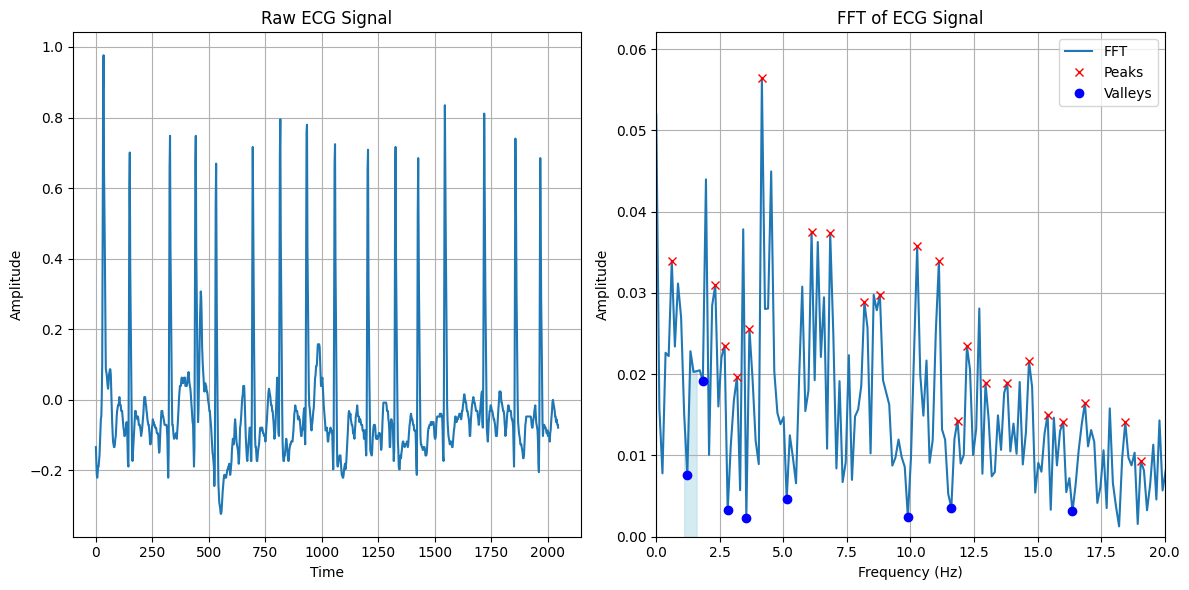

2


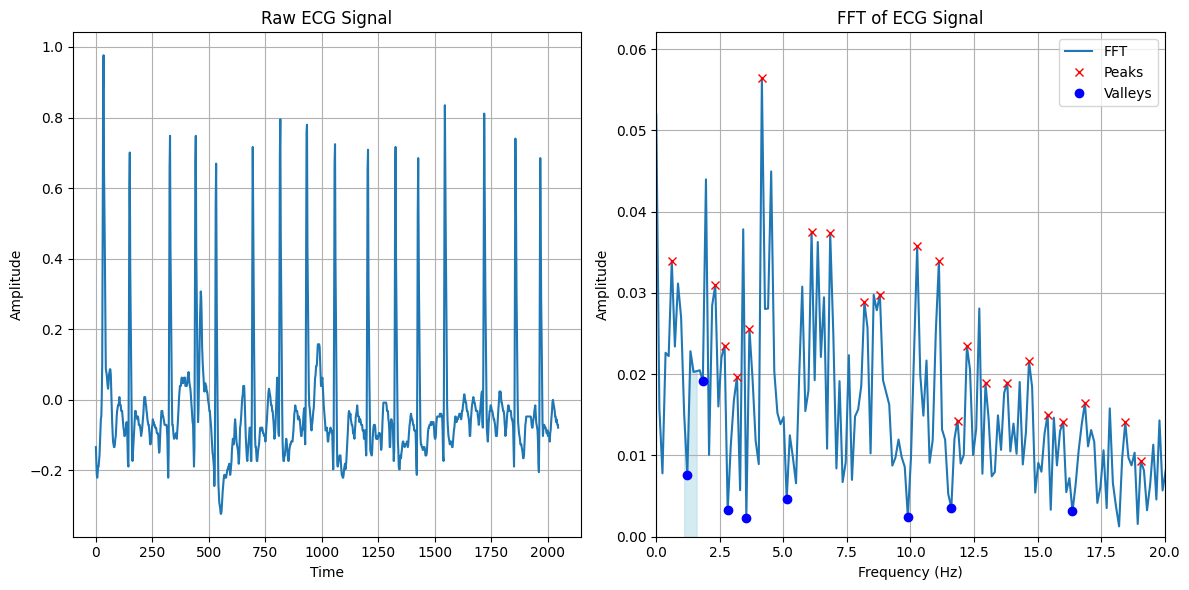

2.5


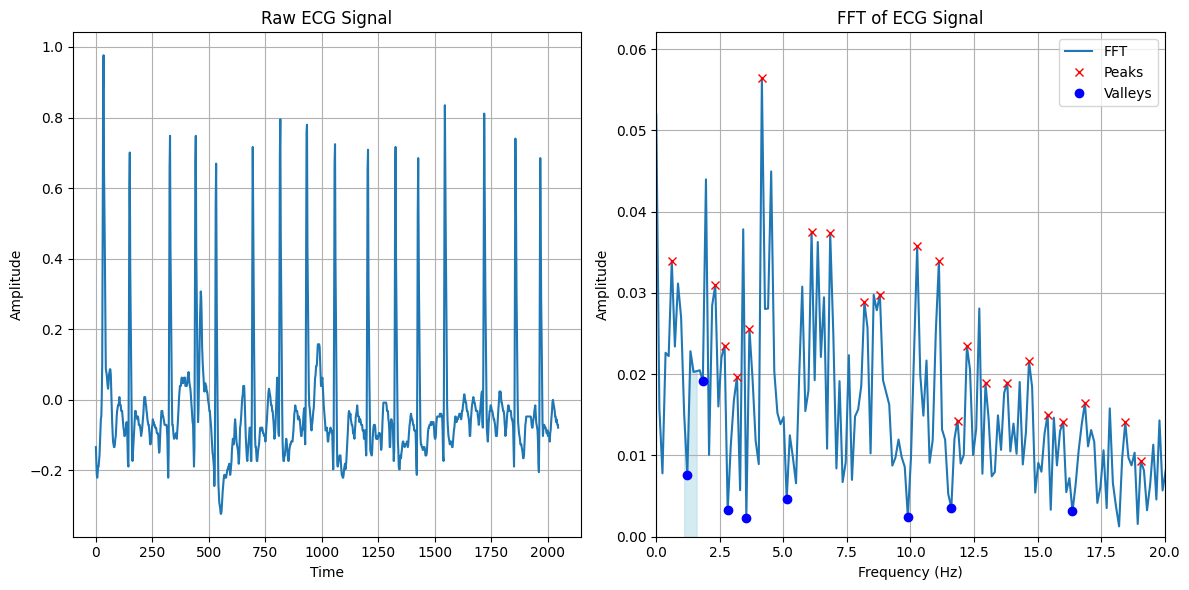

3


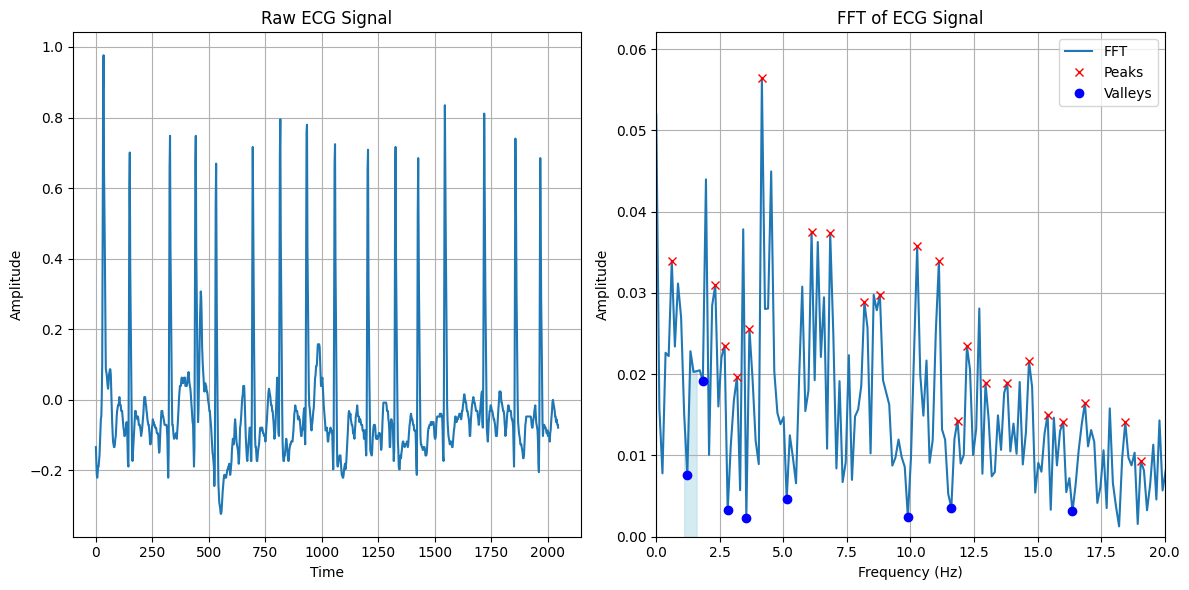

5


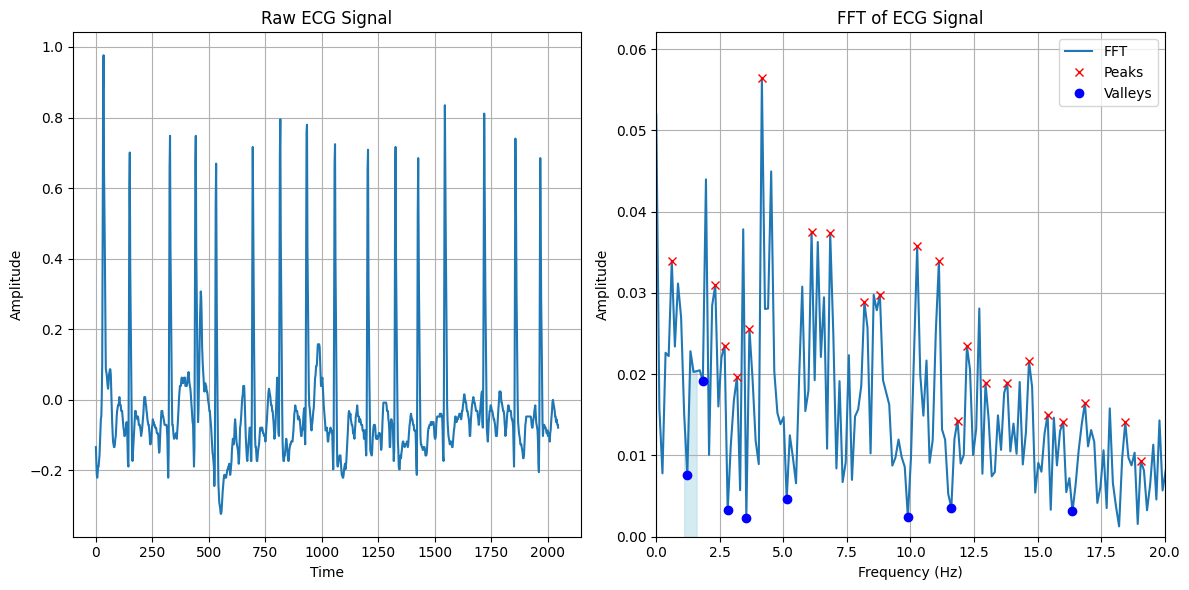

10


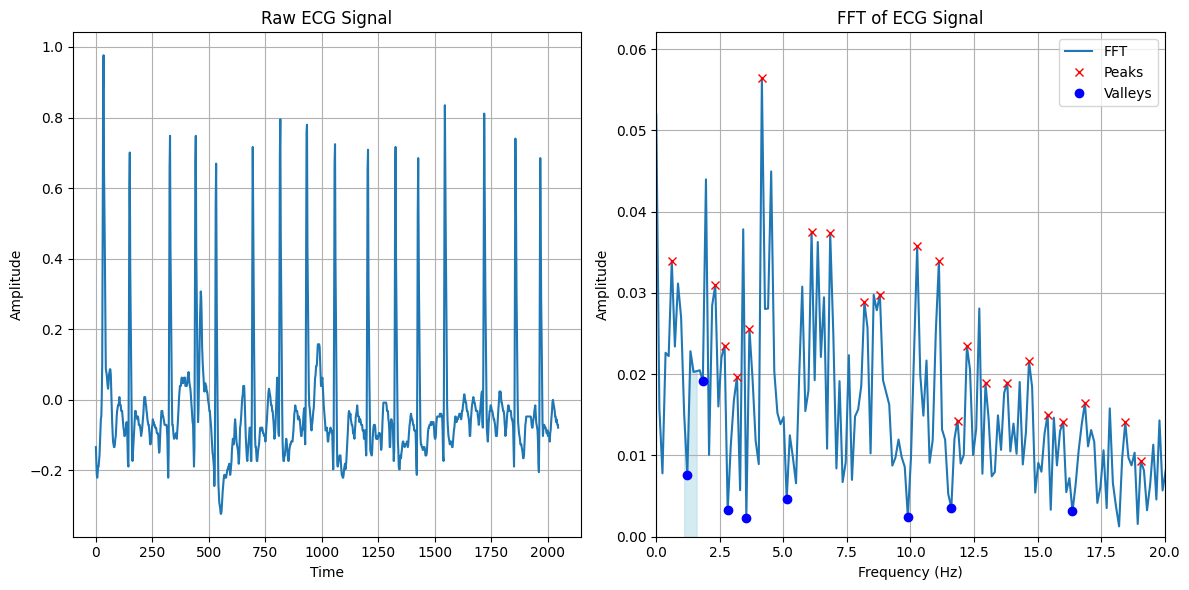

In [80]:
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = 250

# List of signals
signal = getWaveform("Atrial_Fibrillation", 1, "ECG")
vals=[1, 1.5, 2, 2.5, 3, 5, 10]

for val in vals:
    print(val)
    # Time-domain parameters
    N = len(signal)

    # Frequency-domain parameters
    yf = fft(signal)
    xf = fftfreq(N, 1 / fs)[:N // 2]
    yf_processed = 2.0 / N * np.abs(yf[:N // 2])

    # Detect peaks and valleys
    peaks, _ = find_peaks(2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=None,
                          prominence=0.001,
                          width=1.5,
                          rel_height=0.5)
    
    valleys, _ = find_peaks(-2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=None,
                          prominence=0.001,
                          width=3,
                          rel_height=0.5)

    # Plot raw signal and its FFT
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Left plot: Raw signal
    ax[0].plot(signal)
    ax[0].set_title('Raw ECG Signal')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')
    ax[0].grid()

    # Right plot: FFT
    ax[1].plot(xf, yf_processed, label='FFT')
    ax[1].plot(xf[peaks], yf_processed[peaks], "x", label="Peaks", color='red')
    ax[1].plot(xf[valleys], yf_processed[valleys], "o", label="Valleys", color='blue')
    ax[1].fill_between(xf, yf_processed, where=(xf >= 1) & (xf <= 1.67), color='lightblue', alpha=0.5)
    ax[1].set_xlim([0, 20])
    ax[1].set_ylim([0, max(yf_processed) * 1.1])  # Dynamic amplitude limit
    ax[1].set_title('FFT of ECG Signal')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[1].grid()
    ax[1].legend()

    plt.tight_layout()
    plt.show()


In [28]:
def get_num_waves(label, trueAlarm=1):
    return len(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm)].index)

get_num_waves("Healthy")

16

In [74]:
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = 250

labels=[]
labels_passed=[]
diff_median=[]
distance_median=[]
distance_std=[]
num_peaks=[]
num_valleys=[]

signals=[]

for label in df_filtered["Label"].unique():
    for i in range(get_num_waves(label)):
        signals.append(getWaveform(label, i, "ECG"))
        labels.append(label)


for i, signal in enumerate(signals):
    # Time-domain parameters
    N = len(signal)

    # Frequency-domain parameters
    yf = fft(signal)
    xf = fftfreq(N, 1 / fs)[:N // 2]
    yf_processed = 2.0 / N * np.abs(yf[:N // 2])

    # Detect peaks and valleys
    peaks, _ = find_peaks(2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=None,
                          prominence=0.001,
                          width=1.5,
                          rel_height=0.5)
    
    valleys, _ = find_peaks(-2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=None,
                          prominence=0.001,
                          width=3,
                          rel_height=0.5)

    if(not np.isnan(yf).any()):
        diff_median.append(np.median(2.0/N * np.abs(yf[:N//2])[peaks])-np.median(2.0/N * np.abs(yf[:N//2])[valleys]))
        num_peaks.append(len(peaks))
        num_valleys.append(len(valleys))
        intervals=[]
        for pi in range(len(peaks)-1):
            intervals.append(2.0/N * np.abs(yf[:N//2])[peaks[pi+1]]-2.0/N * np.abs(yf[:N//2])[peaks[pi]])
        distance_median.append(np.median(intervals))
        distance_std.append(np.std(intervals))
        labels_passed.append(labels[i])

samples_df=pd.DataFrame({"Labels": labels_passed, "diff_median":diff_median, "dist_median": distance_median, "dist_std": distance_std, "num_peaks":num_peaks, "num_valleys":num_valleys})
samples_df


,Labels,diff_median,dist_median,dist_std,num_peaks,num_valleys
0,Ventricular_Tachycardia,0.086064,-0.017452,51.336903,99,52
1,Ventricular_Tachycardia,-1.357456,-0.007255,31.259263,122,66
2,Ventricular_Tachycardia,0.059476,-0.005194,38.183926,144,61
3,Ventricular_Tachycardia,0.668823,-0.021927,38.837788,122,42
4,Ventricular_Tachycardia,0.276757,-0.015936,41.517671,136,44
...,...,...,...,...,...,...
243,Healthy,0.001644,-0.000318,0.008956,44,25
244,Healthy,0.004724,-0.000224,0.007710,31,39
245,Healthy,0.002327,-0.000133,0.041828,49,56
246,Healthy,0.007972,-0.000084,0.004355,45,23


In [34]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.6 MB/s eta 0:00:00


In [77]:
import umap
from sklearn.preprocessing import StandardScaler

umap_df=samples_df.loc[samples_df["Labels"].isin(["Ventricular_Tachycardia", "Ventricular_Flutter_Fib", "Atrial_Fibrillation", "Healthy"])].copy()
umap_df.reset_index(inplace=True, drop=True)
display(umap_df)
reducer = umap.UMAP(random_state=6)
scaled_data = StandardScaler().fit_transform(umap_df.drop(["Labels"], axis=1))
embedding = reducer.fit_transform(scaled_data)

,Labels,diff_median,dist_median,dist_std,num_peaks,num_valleys
0,Ventricular_Tachycardia,0.086064,-0.017452,51.336903,99,52
1,Ventricular_Tachycardia,-1.357456,-0.007255,31.259263,122,66
2,Ventricular_Tachycardia,0.059476,-0.005194,38.183926,144,61
3,Ventricular_Tachycardia,0.668823,-0.021927,38.837788,122,42
4,Ventricular_Tachycardia,0.276757,-0.015936,41.517671,136,44
...,...,...,...,...,...,...
96,Healthy,0.001644,-0.000318,0.008956,44,25
97,Healthy,0.004724,-0.000224,0.007710,31,39
98,Healthy,0.002327,-0.000133,0.041828,49,56
99,Healthy,0.007972,-0.000084,0.004355,45,23


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


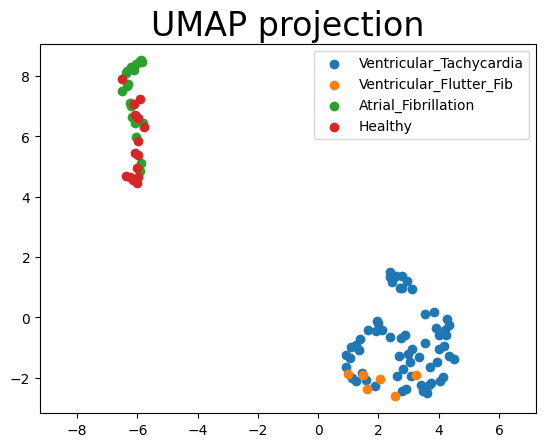

In [78]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
c_encoded=label_encoder.fit_transform(umap_df["Labels"])

for label in umap_df["Labels"].unique():
    plt.scatter(
        embedding[umap_df.loc[umap_df["Labels"]==label].drop("Labels", axis=1).index, 0],
        embedding[umap_df.loc[umap_df["Labels"]==label].drop("Labels", axis=1).index, 1],
        label=label)
plt.legend()
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24);